In [1]:
import sys
sys.path.append("../")
sys.path.append('C:\Users\James Pino\PycharmProjects\Magine')

In [2]:
from IPython.display import display
%matplotlib inline
import pandas as pd
import networkx as nx
import magine.ontology.enrichment_tools as et
from magine.networks.visualization.cytoscape_js_view import create_subnetwork, display_graph
from magine.plotting.wordcloud_tools import word_cloud_from_array

<IPython.core.display.Javascript object>

First, lets load the molecular network and the enrichment output from the previous runs. 

In [3]:
enrichment_array = pd.read_csv('Data/all_cisplatin_out.csv.gz', index_col=0)
network = nx.read_gpickle('Data/cisplatin_network.p')

This enrichment dataframe contains all the enrichment data from the various databases.

In [4]:
display(enrichment_array.head(10))

,term_name,combined_score,adj_p_value,rank,genes,n_genes,db,category,sample_id
0,"mRNA splicing, via spliceosome",244.428316,4.004356e-25,1,"ALYREF,DDX39A,DDX39B,DDX5,DHX9,ELAVL1,FIP1L1,FUS,HNRNPA0,HNRNPA1,HNRNPA2B1,HNRNPA3,HNRNPC,HNRNPD...",54,GO_Biological_Process_2017,proteomics_both,01hr
1,SRP-dependent cotranslational protein targeting to membrane,163.857942,8.882552e-17,2,"RPL11,RPL13,RPL13A,RPL14,RPL15,RPL17,RPL18A,RPL19,RPL21,RPL22,RPL23A,RPL29,RPL3,RPL36,RPL37A,RPL...",28,GO_Biological_Process_2017,proteomics_both,01hr
2,"nuclear-transcribed mRNA catabolic process, nonsense-mediated decay",158.589542,6.926429e-16,3,"PABPC1,RBM8A,RPL11,RPL13,RPL13A,RPL14,RPL15,RPL17,RPL18A,RPL19,RPL21,RPL22,RPL23A,RPL29,RPL3,RPL...",30,GO_Biological_Process_2017,proteomics_both,01hr
3,rRNA processing,157.751396,9.500549e-18,4,"DKC1,FBL,NOL8,NOLC1,NOP56,RPL11,RPL13,RPL13A,RPL14,RPL15,RPL17,RPL18A,RPL19,RPL21,RPL22,RPL23A,R...",40,GO_Biological_Process_2017,proteomics_both,01hr
4,translational initiation,131.751148,2.181663e-17,5,"EIF2S2,EIF2S3,EIF3B,PABPC1,RPL11,RPL13,RPL13A,RPL14,RPL15,RPL17,RPL18A,RPL19,RPL21,RPL22,RPL23A,...",32,GO_Biological_Process_2017,proteomics_both,01hr
5,viral transcription,130.939337,7.045307e-18,6,"NUP188,NUP88,NUP98,RPL11,RPL13,RPL13A,RPL14,RPL15,RPL17,RPL18A,RPL19,RPL21,RPL22,RPL23A,RPL29,RP...",32,GO_Biological_Process_2017,proteomics_both,01hr
6,translation,116.719681,2.636988e-14,7,"EIF4EBP2,MRPS33,PABPC4,RPL11,RPL13,RPL13A,RPL14,RPL15,RPL17,RPL18A,RPL19,RPL21,RPL22,RPL23A,RPL2...",33,GO_Biological_Process_2017,proteomics_both,01hr
7,mRNA processing,97.760595,1.501360e-15,8,"ALKBH5,CPSF6,HNRNPA0,HNRNPA1,HNRNPA2B1,KIN,NONO,PRPF3,PRPF8,PTBP1,SF3A1,SFPQ,SNRNP70,SON,SRSF1,S...",21,GO_Biological_Process_2017,proteomics_both,01hr
8,RNA export from nucleus,76.122617,3.366579e-12,9,"ALYREF,DDX39A,DDX39B,HNRNPA1,NUP188,NUP98,RANBP3,RBM8A,SARNP,SRSF1,SRSF3,SRSF4,SRSF5,SRSF6,SRSF7...",20,GO_Biological_Process_2017,proteomics_both,01hr
9,termination of RNA polymerase II transcription,74.621748,3.137348e-11,10,"ALYREF,DDX39A,DDX39B,FIP1L1,RBM8A,SARNP,SNRPB,SNRPD3,SNRPE,SNRPF,SRSF1,SRSF3,SRSF4,SRSF5,SRSF6,S...",20,GO_Biological_Process_2017,proteomics_both,01hr


For this example, we have proteomics and RNAseq data. We assume they are on different time scales, we analyze them separetly.

In [5]:
proteomics = enrichment_array[enrichment_array['category'].str.contains('proteomics')].copy()
rnaseq = enrichment_array[enrichment_array['category'].str.contains('rna')].copy()

For this example, we just want to look at "biological processes" descriptions, so we will limit our analysis to only databases with this type of information

In [6]:
print(proteomics['db'].unique())

process_dbs = [
        'GO_Biological_Process_2017',
        'Humancyc_2016',
        'Reactome_2016',
        'KEGG_2016',
        'NCI-Nature_2016',
        'Panther_2016',
        'WikiPathways_2016',
]


['GO_Biological_Process_2017' 'GO_Molecular_Function_2017'
 'GO_Cellular_Component_2017' 'KEGG_2016' 'NCI-Nature_2016' 'Panther_2016'
 'WikiPathways_2016' 'BioCarta_2016' 'Humancyc_2016' 'Reactome_2016'
 'KEA_2015' 'ChEA_2016' 'DrugMatrix' 'Drug_Perturbations_from_GEO_2014']


In [10]:
time_1_hour_prot = et.filter_dataframe(proteomics, p_value=0.05, combined_score=0.0, category='proteomics_up', sample_id='01hr', db=process_dbs)
display(time_1_hour_prot)

,term_name,combined_score,adj_p_value,rank,genes,n_genes,db,category,sample_id
112198,"negative regulation of transcription, DNA-templated",68.261978,0.001601,1,"ARID5B,BCLAF1,BRCA1,CALR,CBY1,CHD8,ENO1,HDAC1,ILF3,KHDRBS1,LIMS1,LRRFIP1,MYB,RBM15,RSF1,SHC1,SPE...",22,GO_Biological_Process_2017,proteomics_up,01hr
114511,Cell Cycle_Homo sapiens_R-HSA-1640170,36.507320,0.000267,1,"ACD,AKAP9,BRCA1,CDC16,CDC20,CDC7,CLASP2,DCTN1,HAUS8,HDAC1,HSPA2,KNTC1,LMNA,MAPK3,MYC,NPM1,NUP188...",28,Reactome_2016,proteomics_up,01hr
114512,Interleukin-2 signaling_Homo sapiens_R-HSA-451927,30.220851,0.001586,2,"AKAP9,BRAF,CNKSR2,CUL3,HAVCR2,INPPL1,IRS2,MAPK3,MARK3,PTPRA,RASGRF2,SHC1,SPTBN1,SPTBN2,TLN1,VWF",16,Reactome_2016,proteomics_up,01hr
112200,resolution of meiotic recombination intermediates,29.557281,0.016485,3,"ERCC4,SLX4,TOP2A,TOP2B",4,GO_Biological_Process_2017,proteomics_up,01hr
114513,"Interleukin-3, 5 and GM-CSF signaling_Homo sapiens_R-HSA-512988",29.303950,0.001586,3,"AKAP9,BRAF,CNKSR2,CUL3,INPPL1,IRS2,MAPK3,MARK3,PTPRA,RASGRF2,SHC1,SPTBN1,SPTBN2,TLN1,VWF,YWHAZ",16,Reactome_2016,proteomics_up,01hr
114514,"Cell Cycle, Mitotic_Homo sapiens_R-HSA-69278",27.727089,0.001586,4,"AKAP9,CDC16,CDC20,CDC7,CLASP2,DCTN1,HAUS8,HDAC1,KNTC1,LMNA,MAPK3,MYC,NUP188,NUP88,PDS5B,PLK1,PRI...",22,Reactome_2016,proteomics_up,01hr
114515,Interleukin receptor SHC signaling_Homo sapiens_R-HSA-912526,27.242088,0.001586,5,"AKAP9,BRAF,CNKSR2,CUL3,INPPL1,IRS2,MAPK3,MARK3,PTPRA,RASGRF2,SHC1,SPTBN1,SPTBN2,TLN1,VWF",15,Reactome_2016,proteomics_up,01hr
114516,MAPK family signaling cascades_Homo sapiens_R-HSA-5683057,26.440058,0.001586,6,"AKAP9,BRAF,CNKSR2,CUL3,DNAJB1,IRS2,MAPK3,MARK3,MYC,PTPRA,RASGRF2,SHC1,SPTBN1,SPTBN2,TLN1,VWF",16,Reactome_2016,proteomics_up,01hr
114517,Signaling by FGFR2_Homo sapiens_R-HSA-5654738,25.922377,0.001586,7,"AKAP9,BRAF,CNKSR2,CUL3,HNRNPA1,HNRNPM,INSR,IRS2,MAPK3,MAPKAP1,MARK3,PTPRA,RASGRF2,SHC1,SPTBN1,SP...",18,Reactome_2016,proteomics_up,01hr
114518,Insulin receptor signalling cascade_Homo sapiens_R-HSA-74751,25.791980,0.001586,8,"AKAP9,BRAF,CNKSR2,CUL3,INSR,IRS2,MAPK3,MARK3,PIK3R4,PTPRA,RASGRF2,SHC1,SPTBN1,SPTBN2,TLN1,VWF",16,Reactome_2016,proteomics_up,01hr


Since terms across databases might be redundant ("Interleukin-3, 5 and GM-CSF signaling_Homo sapiens_R-HSA-512988" and "Interleukin receptor SHC signaling_Homo sapiens_R-HSA-912526" have nearly a full overlap of genes), we want to eliminate duplicate terms and focus on the most enriched. For that we use the Jaccard Index. It is implmented in the find_similar_terms function in enrichment_tools (et).

In [11]:
filtered = et.find_similar_terms(time_1_hour_prot)
display(filtered)

Number of rows went from 89 to 32


,term_name,combined_score,adj_p_value,rank,genes,n_genes,db,category,sample_id
112198,"negative regulation of transcription, DNA-templated",68.261978,0.001601,1,"ARID5B,BCLAF1,BRCA1,CALR,CBY1,CHD8,ENO1,HDAC1,ILF3,KHDRBS1,LIMS1,LRRFIP1,MYB,RBM15,RSF1,SHC1,SPE...",22,GO_Biological_Process_2017,proteomics_up,01hr
114511,Cell Cycle_Homo sapiens_R-HSA-1640170,36.507320,0.000267,1,"ACD,AKAP9,BRCA1,CDC16,CDC20,CDC7,CLASP2,DCTN1,HAUS8,HDAC1,HSPA2,KNTC1,LMNA,MAPK3,MYC,NPM1,NUP188...",28,Reactome_2016,proteomics_up,01hr
114512,Interleukin-2 signaling_Homo sapiens_R-HSA-451927,30.220851,0.001586,2,"AKAP9,BRAF,CNKSR2,CUL3,HAVCR2,INPPL1,IRS2,MAPK3,MARK3,PTPRA,RASGRF2,SHC1,SPTBN1,SPTBN2,TLN1,VWF",16,Reactome_2016,proteomics_up,01hr
112200,resolution of meiotic recombination intermediates,29.557281,0.016485,3,"ERCC4,SLX4,TOP2A,TOP2B",4,GO_Biological_Process_2017,proteomics_up,01hr
114517,Signaling by FGFR2_Homo sapiens_R-HSA-5654738,25.922377,0.001586,7,"AKAP9,BRAF,CNKSR2,CUL3,HNRNPA1,HNRNPM,INSR,IRS2,MAPK3,MAPKAP1,MARK3,PTPRA,RASGRF2,SHC1,SPTBN1,SP...",18,Reactome_2016,proteomics_up,01hr
114519,Signalling by NGF_Homo sapiens_R-HSA-166520,25.783068,0.001586,9,"AKAP13,AKAP9,ARHGEF16,BRAF,CNKSR2,CUL3,HDAC1,INSR,IRS2,MAPK3,MAPKAP1,MARK3,MEF2C,PTPRA,RASGRF2,S...",21,Reactome_2016,proteomics_up,01hr
112204,mitotic cytokinesis,24.798241,0.030953,7,"APC,CEP55,PDCD6IP,PLK1,SPTBN1",5,GO_Biological_Process_2017,proteomics_up,01hr
114533,MAP2K and MAPK activation_Homo sapiens_R-HSA-5674135,22.681718,0.001586,23,"BRAF,CNKSR2,MAPK3,MARK3,TLN1,VWF",6,Reactome_2016,proteomics_up,01hr
114092,XPodNet - protein-protein interactions in the podocyte expanded by STRING_Mus musculus_WP2309,22.460249,0.011088,1,"APC,ARPC1A,BRAF,CAPZA1,CDH7,CLNK,EIF4ENIF1,IGFBP2,INPPL1,INSR,IRS2,KHDRBS1,KLC2,LASP1,LIMS1,LRP1...",30,WikiPathways_2016,proteomics_up,01hr
112205,chloride transport,22.310453,0.029255,8,"ANO4,ANO5,ANO6,CLIC4,SLC26A8",5,GO_Biological_Process_2017,proteomics_up,01hr


Now we can explore the top hits, which has been slimmed from 89 to 33 terms. Generally this is where the expert knowledge comes in. However, a quick search with each term and search terms of you molecule of interest tend to be useful. 

The first hit is 'negative regulation of transcription', which means that something caused genes not to be transcribed. Cisplatin causes DNA damage, thus negative regulaton of transcription makes sense. So does top hit 2, 'Cell Cycle_Homo sapiens_R-HSA-1640170'. 

A quick search for 'Interleukin-2 signaling' and 'Cisplatin' __[link](https://www.google.com/search?rlz=1C1CHBD_enUS721US721&ei=KzNeWuCxBsfq_AaSgYuYDQ&q=Interleukin-2+signaling+cisplatin&oq=Interleukin-2+signaling+cisplatin&gs_l=psy-ab.3..35i39k1.8097.9052.0.9196.10.10.0.0.0.0.145.897.7j3.10.0....0...1c.1.64.psy-ab..3.2.218....0.TInUjcZY740)__ returns a paper titled "Cisplatin at clinically relevant concentrations enhances interleukin-2 synthesis by human primary blood lymphocytes." __[link](https://www.ncbi.nlm.nih.gov/pubmed/10211553)__


We can link the two together to see how once might regulate the other by looking at the molecular interactions.

In [12]:
terms = list(time_1_hour_prot['term_name'])[0:2]
print(terms)

['negative regulation of transcription, DNA-templated ', 'Cell Cycle_Homo sapiens_R-HSA-1640170']


In [13]:
shorten_names = {'Cell Cycle_Homo sapiens_R-HSA-1640170':'Cell Cycle',
                 'DNA Repair_Homo sapiens_R-HSA-73894' : 'DNA Repair',
                 'MAP2K and MAPK activation_Homo sapiens_R-HSA-5674135' : 'MAPK signals',
                 'Interleukin-2 signaling_Homo sapiens_R-HSA-451927': 'IL2',
                }
renamed = proteomics.copy()
renamed['term_name'] = renamed['term_name'].replace(shorten_names)
term_net, mol_net = create_subnetwork(shorten_names.values(), renamed, network, '1hr', cytoscape_js=False)

('DNA Repair', 79)
('MAPK signals', 18)
('IL2', 72)
('Cell Cycle', 200)
Looking for direct edges


In [14]:
display_graph(term_net)

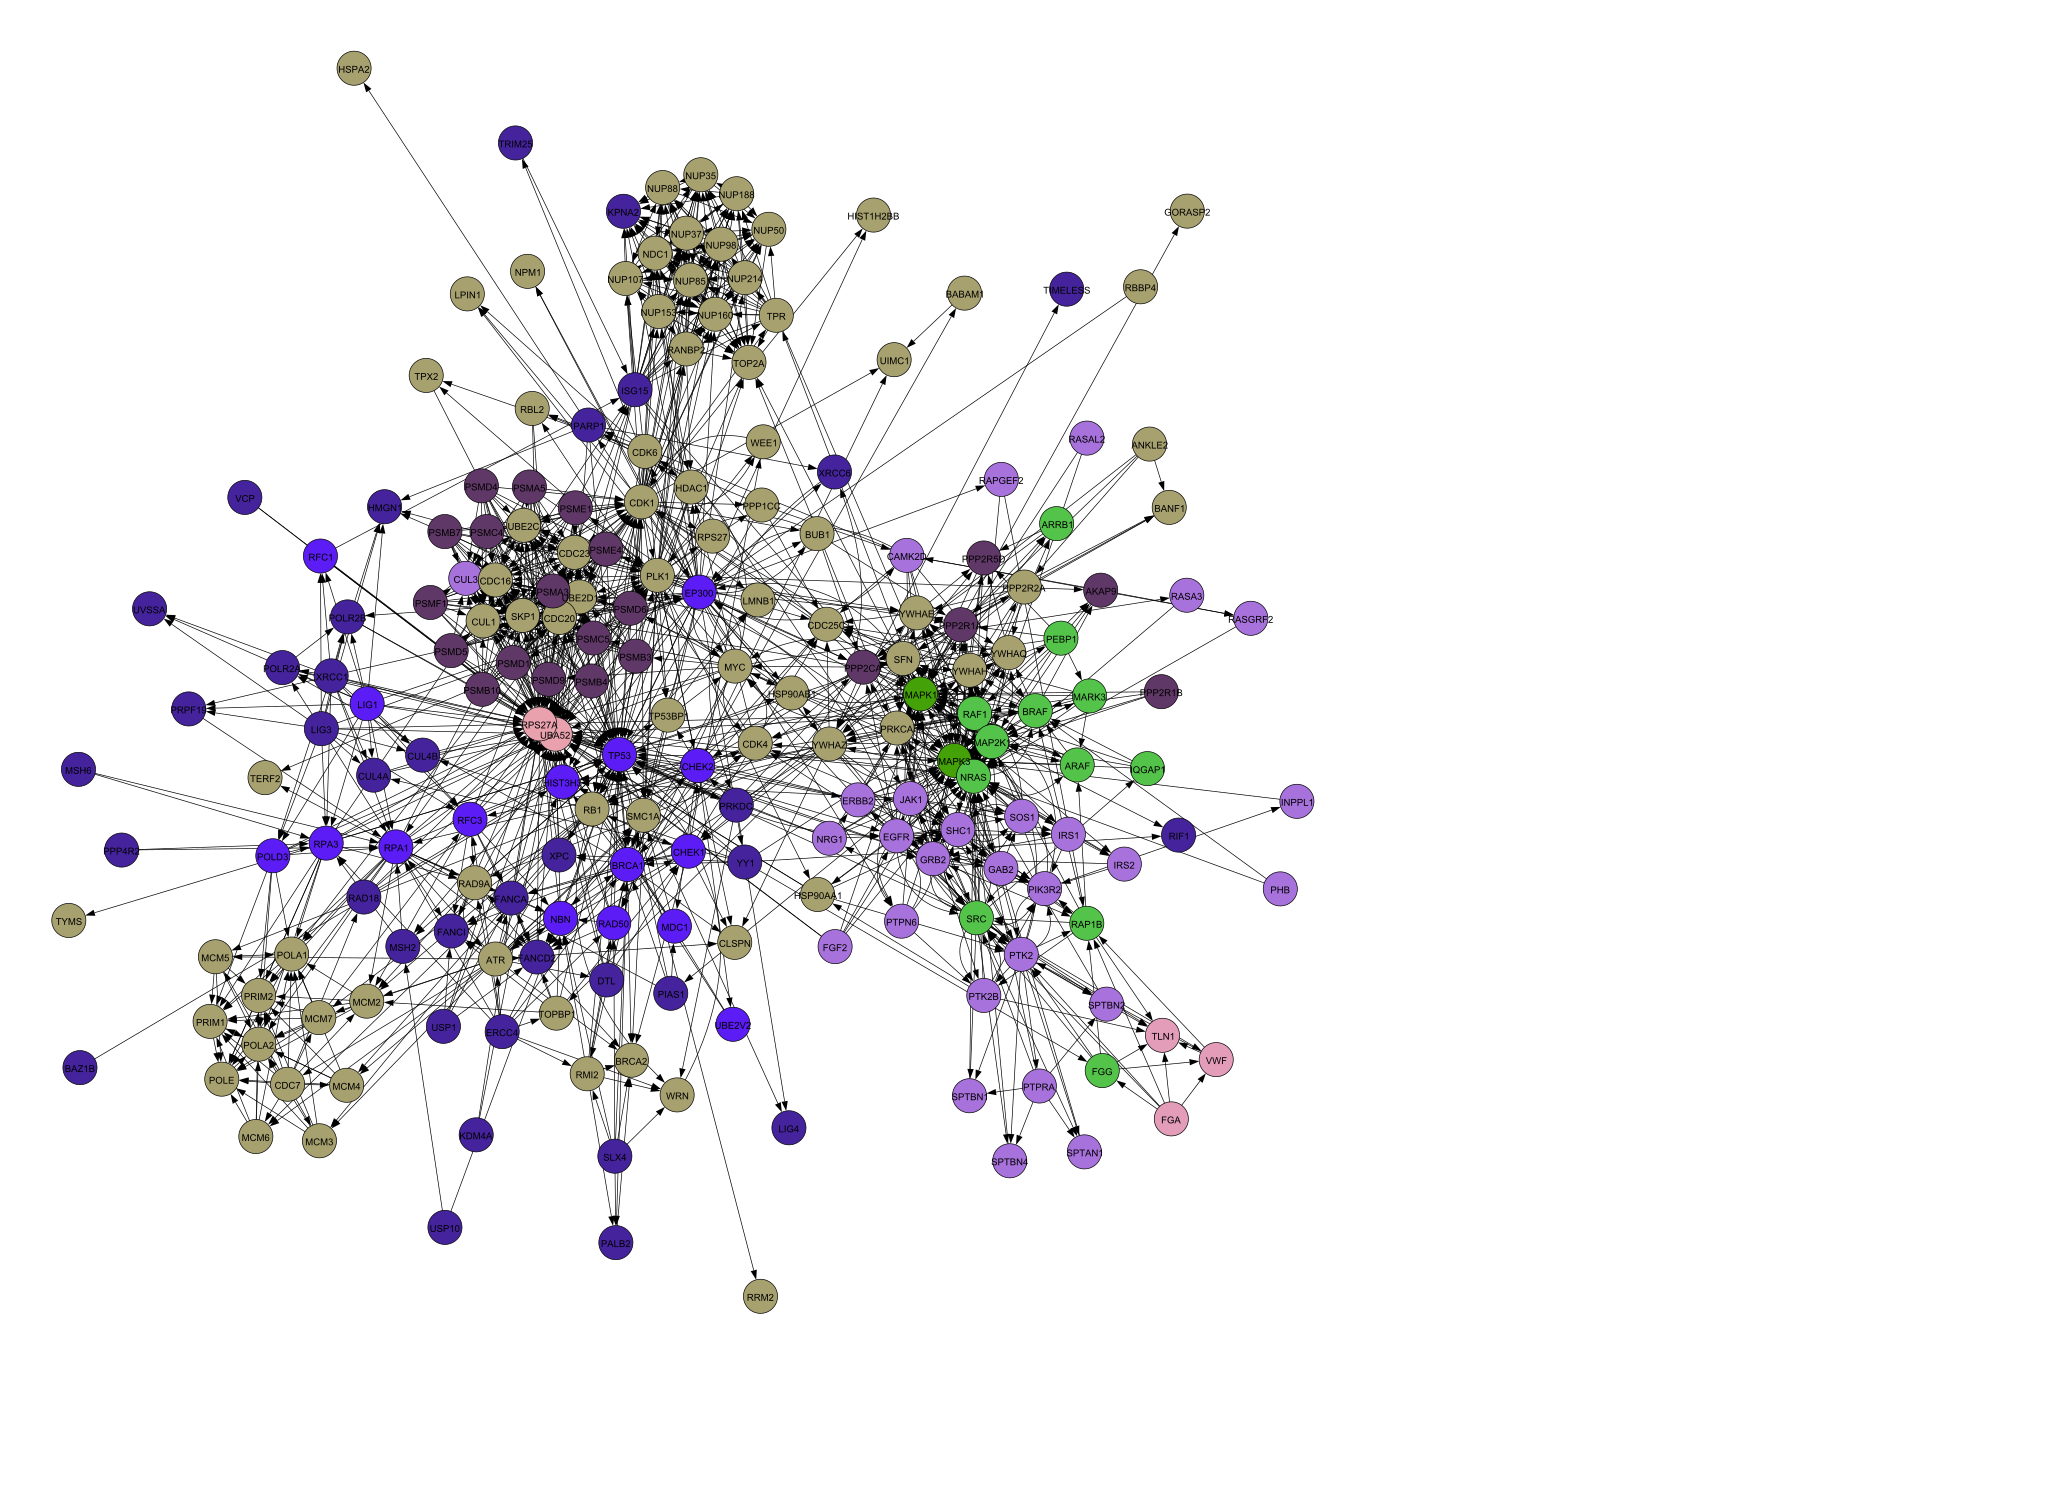

In [16]:
display_graph(mol_net,True, display_format='igraph')

Now we will explore the enrichment per time point looking at proteomics data that is up-regulated.

In [ ]:
prot_enriched, words_array = word_cloud_from_array(enrichment_array, 'proteomics_up', ['01hr','06hr','24hr','48hr'],
                                             database_list=process_dbs)

Now, we will go through each time point and see what terms are reoccuring in the enrichment results.

In [ ]:
display(words_array.sort_values('01hr', ascending=False).head(20))

In [ ]:
# added terms for 1hr
keywords_1 = [
    'ner',
    'nucleotide excision',
    'cell cycle',
    'frs',
    'egfr',
    'insulin',
    'transcription',
    'mapk'
]

In [16]:
time_6_hour_prot = et.filter_dataframe(proteomics, p_value=0.05, combined_score=0.0, category='proteomics_up', sample_id='06hr', db=process_dbs)
slimmed = et.find_similar_terms(time_6_hour_prot)
display(slimmed.head(25))

Number of rows went from 265 to 185


,term_name,combined_score,adj_p_value,rank,genes,n_genes,db,category,sample_id
124451,"mRNA splicing, via spliceosome",87.396296,1.684701e-07,1,"CPSF2,CPSF3,DHX15,DHX8,DHX9,EIF4A3,HNRNPA2B1,HNRNPC,HNRNPH3,HNRNPK,HNRNPU,MAGOHB,NCBP1,PNN,PRPF3...",27,GO_Biological_Process_2017,proteomics_up,06hr
126815,mRNA processing_Mus musculus_WP310,57.331009,6.868228e-10,1,"ACIN1,BCLAF1,BRWD1,CPSF2,CPSF3,DDX20,DDX21,DHX15,DHX8,DHX9,EIF3G,EIF4A3,HNRNPA2B1,HNRNPC,HNRNPK,...",39,WikiPathways_2016,proteomics_up,06hr
124452,positive regulation of transcription from RNA polymerase II promoter,56.402442,6.010178e-03,2,"AATF,ARHGEF2,ATF2,CCNL1,CEBPZ,EGFR,FOXK2,FUBP3,HMGA1,HNRNPK,IRF2BPL,JUN,JUNB,JUND,KMT2D,MAPK3,MA...",37,GO_Biological_Process_2017,proteomics_up,06hr
127321,Gene Expression_Homo sapiens_R-HSA-74160,55.510780,5.921719e-09,1,"AEBP2,ANP32A,ATF2,ATR,BMS1,BOP1,CPSF2,CPSF3,DARS,DDX20,DDX21,DHX9,DKC1,EIF2S2,EIF3A,EIF3G,EIF4A3...",91,Reactome_2016,proteomics_up,06hr
124453,RNA splicing,50.639384,1.510552e-05,3,"DHX15,DHX8,EIF4A3,HNRNPC,HNRNPH3,MAGOHB,NCBP1,RNPS1,SCAF11,SF3B2,SFPQ,SNRNP40,SRSF2,SYNCRIP,WDR62",15,GO_Biological_Process_2017,proteomics_up,06hr
124454,mRNA export from nucleus,46.486449,2.371966e-05,4,"CPSF2,CPSF3,EIF4A3,HNRNPA2B1,MAGOHB,NCBP1,NUP153,NUP188,NUP214,NUP35,NUP98,RBM8A,RNPS1,SRSF2,TPR",15,GO_Biological_Process_2017,proteomics_up,06hr
124455,rRNA processing,45.422599,3.304134e-04,5,"BMS1,BOP1,DKC1,NOP56,NOP58,PES1,RPL12,RPL3,RPL8,RPP30,RPS6,RPS9,RRP1B,RRP9,UTP14A,UTP18,WDR43,WDR75",18,GO_Biological_Process_2017,proteomics_up,06hr
124456,protein sumoylation,42.216525,6.080538e-05,6,"BCL11A,NUP153,NUP188,NUP214,NUP35,NUP98,SENP2,TOP2A,TOP2B,TP53BP1,TPR,TRIM28",12,GO_Biological_Process_2017,proteomics_up,06hr
126341,RNA transport_Homo sapiens_hsa03013,41.821069,4.495322e-08,1,"ACIN1,DDX20,EIF2S2,EIF3A,EIF3G,EIF4A3,EIF4B,EIF4EBP1,ELAC2,MAGOHB,NCBP1,NUP153,NUP188,NUP214,NUP...",23,KEGG_2016,proteomics_up,06hr
126342,Spliceosome_Homo sapiens_hsa03040,38.345407,4.797907e-08,2,"ACIN1,DHX15,DHX8,EIF4A3,HNRNPC,HNRNPK,HNRNPU,HSPA1A,MAGOHB,NCBP1,PRPF38A,PUF60,RBM25,RBM8A,RBMXL...",20,KEGG_2016,proteomics_up,06hr


In [17]:
time_24_hour_prot = et.filter_dataframe(proteomics, p_value=0.05, combined_score=0.0, category='proteomics_up', sample_id='24hr', db=process_dbs)
slimmed = et.find_similar_terms(time_24_hour_prot)
display(slimmed.head(25))

Number of rows went from 378 to 230


,term_name,combined_score,adj_p_value,rank,genes,n_genes,db,category,sample_id
137544,"mRNA splicing, via spliceosome",209.979563,3.357108e-21,1,"CPSF1,CSTF1,CWC15,DDX42,EFTUD2,EIF4A3,FIP1L1,FUS,HNRNPA1,HNRNPA2B1,HNRNPA3,HNRNPC,HNRNPD,HNRNPF,...",53,GO_Biological_Process_2017,proteomics_up,24hr
141152,Processing of Capped Intron-Containing Pre-mRNA_Homo sapiens_R-HSA-72203,106.902995,3.188379e-19,1,"CPSF1,CSTF1,CWC15,EFTUD2,EIF4A3,FIP1L1,FUS,HNRNPA1,HNRNPA2B1,HNRNPA3,HNRNPC,HNRNPD,HNRNPF,HNRNPK...",46,Reactome_2016,proteomics_up,24hr
141153,Gene Expression_Homo sapiens_R-HSA-74160,102.139686,1.220822e-18,2,"AIMP2,ANP32A,ATF2,ATR,BNIP3L,BOP1,C2ORF49,CD3EAP,CDK12,CHD3,CPSF1,CSTF1,CWC15,DARS,DDX21,DDX4,DD...",152,Reactome_2016,proteomics_up,24hr
137545,rRNA processing,96.343182,4.915441e-10,2,"BOP1,DDX49,DKC1,EBNA1BP2,FBL,HEATR1,IMP3,KRR1,MDN1,MPHOSPH6,NOL11,NOLC1,NOP56,NOP58,PWP2,RPL12,R...",33,GO_Biological_Process_2017,proteomics_up,24hr
137546,regulation of cellular response to heat,84.291259,2.769570e-11,3,"ATR,BAG3,CAMK2D,CCAR2,GSK3B,HSF1,HSP90AA1,HSPB8,MAPK1,MAPK3,MTOR,NUP107,NUP153,NUP188,NUP214,NUP...",23,GO_Biological_Process_2017,proteomics_up,24hr
140582,mRNA processing_Mus musculus_WP310,75.595732,1.401438e-13,1,"ACIN1,AKAP1,BCLAF1,CPSF1,CSTF1,DDX21,DDX4,DND1,EFTUD2,EIF4A3,EIF4G3,FBL,HNRNPA2B1,HNRNPAB,HNRNPC...",57,WikiPathways_2016,proteomics_up,24hr
137547,mRNA export from nucleus,73.912638,1.055205e-09,4,"CPSF1,EIF4A3,FIP1L1,HNRNPA2B1,NCBP1,NUP107,NUP153,NUP188,NUP214,NUP35,NUP37,NUP50,NUP88,NUP98,RA...",24,GO_Biological_Process_2017,proteomics_up,24hr
141154,mRNA Splicing - Major Pathway_Homo sapiens_R-HSA-72163,72.889668,3.086805e-14,3,"CPSF1,CSTF1,CWC15,EFTUD2,EIF4A3,FIP1L1,FUS,HNRNPA1,HNRNPA2B1,HNRNPA3,HNRNPC,HNRNPD,HNRNPF,HNRNPK...",33,Reactome_2016,proteomics_up,24hr
141156,Cell Cycle_Homo sapiens_R-HSA-1640170,62.048920,6.097046e-10,5,"AKAP9,ATR,BANF1,CEP131,CNTRL,DIDO1,DKC1,DYNC1H1,EMD,ERCC6L,GORASP2,HAUS6,HSP90AA1,HSPA2,KIF2A,KN...",62,Reactome_2016,proteomics_up,24hr
137548,mitotic nuclear envelope disassembly,60.168653,3.732916e-09,5,"BANF1,EMD,LMNA,LPIN1,NEK9,NUP107,NUP153,NUP188,NUP214,NUP35,NUP37,NUP50,NUP88,NUP98,RANBP2,TPR",16,GO_Biological_Process_2017,proteomics_up,24hr


In [30]:
shorten_names = {
                 'Cell Cycle_Homo sapiens_R-HSA-1640170': 'Cell Cycle',
                 'DNA Repair_Homo sapiens_R-HSA-73894': 'DNA Repair',
                 'positive regulation of apoptotic process ' : 'Apoptotic process',
                }
renamed = proteomics.copy()
renamed['term_name'] = renamed['term_name'].replace(shorten_names)
term_net, mol_net = create_subnetwork(shorten_names.values(), renamed, network, '1hr', cytoscape_js=False)

('DNA Repair', 79)
('Cell Cycle', 200)
('Apoptotic process', 71)
Looking for direct edges


In [31]:
display_graph(mol_net,add_parent=True )

In [32]:
display_graph(term_net)

Now we can use these words to filter our enrichment array.

In [ ]:
filtered = et.filter_based_on_words(prot_enriched[0], keywords_1)
filtered = et.find_similar_terms(filtered)
display(filtered.head(25))
print("There are {} terms with selected keywords".format(filtered.shape[0]))

Lets start storing terms to look at.

In [ ]:
interesting_terms_1 = []

interesting_terms_1.append('Cell Cycle_Homo sapiens_R-HSA-1640170')
interesting_terms_1.append('MAPK family signaling cascades_Homo sapiens_R-HSA-5683057')
interesting_terms_1.append('Transcription-Coupled Nucleotide Excision Repair (TC-NER)_Homo sapiens_R-HSA-6781827')

This is where the network we generated comes into play. We load it, then use the function "create_subnetwork" to create a network connecting the two terms we are interested in.

In [ ]:
network = nx.read_gpickle('Data/cisplatin_network.p')
create_subnetwork(interesting_terms_1, proteomics, network, '1hr', cytoscape_js=True)

In [ ]:
display(words_array.sort_values('06hr', ascending=False).head(45))

In [ ]:
#  added terms from 6hr
keywords_6 = [
#     'tp53',  # 7 hits
#     'dna damage', # 4 hits
#     'cell cycle', # 5 hits
#     'cell death', # 3 hits
#     'damage response',  # 3 hits
#     'apoptotic',  # 3 hits
    'response',
    'transcription'
]

In [ ]:
filtered = filter_based_on_words(prot_enriched[1], keywords_6)
display(filtered)
print("There are {} terms with selected keywords".format(filtered.shape[0]))

In [ ]:
interesting_terms_2 = []

interesting_terms_2.append('Transcriptional Regulation by TP53_Homo sapiens_R-HSA-3700989')
interesting_terms_2.append('Cell Cycle Checkpoints_Homo sapiens_R-HSA-69620')
interesting_terms_2.append('DNA Damage Response_Homo sapiens_WP707')

In [ ]:
create_subnetwork(interesting_terms_2, proteomics, network, '6hr', cytoscape_js=True)

In [ ]:
display(words_array.sort_values('24hr', ascending=False).head(45))

In [ ]:
keywords_24 = [
    'dna damage', # 12 hits
    'apoptosis', # 8 hits
    'damage response',  # 7 hits
    'cell death',
    'growth factor',
]

filtered = filter_based_on_words(prot_enriched[2], keywords_24)
display(filtered)
print("There are {} terms with selected keywords".format(filtered.shape[0]))

In [ ]:
interesting_terms_3 = []

interesting_terms_3.append('Caspase Cascade in Apoptosis_Homo sapiens_b9d3ef2e-618f-11e5-8ac5-06603eb7f303')
interesting_terms_3.append('Apoptosis_Homo sapiens_R-HSA-109581')
create_subnetwork(interesting_terms_3, proteomics, network, '24hr', cytoscape_js=True)

In [ ]:
keywords_48 = [
    'apoptotic', # 6 hits
    'apoptosis', # 5 hits
    'cell proliferation ',  # 4 hits
    'cell cycle',   # 4 hits
    'damage response',  #
]

filtered = filter_based_on_words(prot_enriched[3], keywords_48)
display(filtered)
print("There are {} terms with selected keywords".format(filtered.shape[0]))

In [ ]:
interesting_terms_4 = []

interesting_terms_4.append('negative regulation of apoptotic process ')
interesting_terms_4.append('positive regulation of cell proliferation ')
interesting_terms_4.append('positive regulation of apoptotic process ')
create_subnetwork(interesting_terms_4, proteomics, network, '48hr', cytoscape_js=True)

In [ ]:

all_interesting = interesting_terms_1 + interesting_terms_2 + interesting_terms_3 + interesting_terms_4

create_subnetwork(all_interesting, proteomics, network, 'all_times', cytoscape_js=False)